In [2]:
!pip install ctgan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 49.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2

In [4]:
import pandas as pd
from ctgan import TVAE

file_path = 'data.csv'
data = pd.read_csv(file_path)

data = data.drop(columns=['id', 'label1', 'label2'])

from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

tvae = TVAE()
tvae.fit(train_data)

synthetic_data = tvae.sample(len(test_data))

In [5]:
print("Real Data:\n", test_data.head())

Real Data:
        cycle  setting1  setting2  setting3   s1        s2        s3        s4  \
13857    227  0.379310  0.916667       0.0  0.0  0.319277  0.305210  0.441087   
1710     148  0.482759  0.500000       0.0  0.0  0.668675  0.753216  0.659183   
9278      14  0.500000  0.333333       0.0  0.0  0.322289  0.355788  0.212188   
10786    257  0.448276  0.250000       0.0  0.0  0.780120  0.670373  0.861074   
19709    158  0.477011  0.583333       0.0  0.0  0.415663  0.560933  0.338454   

        s5   s6  ...       s14       s15  s16       s17  s18  s19       s20  \
13857  0.0  1.0  ...  0.212354  0.375529  0.0  0.333333  0.0  0.0  0.705426   
1710   0.0  1.0  ...  0.135515  0.640631  0.0  0.583333  0.0  0.0  0.348837   
9278   0.0  0.0  ...  0.224946  0.309735  0.0  0.166667  0.0  0.0  0.635659   
10786  0.0  1.0  ...  0.620755  0.787226  0.0  0.583333  0.0  0.0  0.124031   
19709  0.0  1.0  ...  0.216844  0.320508  0.0  0.333333  0.0  0.0  0.542636   

            s21  RUL  cycl

In [6]:
print("Synthetic Data:\n", synthetic_data.head())

Synthetic Data:
    cycle  setting1  setting2  setting3        s1        s2        s3  \
0     82  0.561487  0.825782 -0.000038 -0.000058  0.335392  0.275444   
1    129  0.523852  0.871968 -0.000021 -0.000002  0.427745  0.369538   
2    136  0.446243  0.858497 -0.000040 -0.000024  0.455001  0.449270   
3     58  0.541756  0.876380  0.000020 -0.000062  0.166762  0.230464   
4    290  0.451757  0.879518  0.000045  0.000024  0.841351  0.649535   

         s4        s5        s6  ...       s14       s15       s16       s17  \
0  0.298322  0.000003  1.000028  ...  0.216643  0.361531 -0.000010  0.333174   
1  0.402758 -0.000027  1.000013  ...  0.216961  0.344196  0.000030  0.416431   
2  0.424669 -0.000056  1.000045  ...  0.241449  0.435668 -0.000033  0.416735   
3  0.267735  0.000011  1.000011  ...  0.254305  0.333107 -0.000034  0.333256   
4  0.878209  0.000006  1.000188  ...  0.391702  0.749086  0.000032  0.749479   

        s18           s19       s20       s21  RUL  cycle_norm  
0  0

In [8]:
!pip install sdv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.1/144.1 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 53.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.9/169.9 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.2/82.2 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 42.1 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


In [10]:
output_file_path = "tvae.csv"

synthetic_data.to_csv(output_file_path, index=False)
print(f"Data saved to {output_file_path}")

Data saved to tvae.csv


In [11]:
!pip install table_evaluator

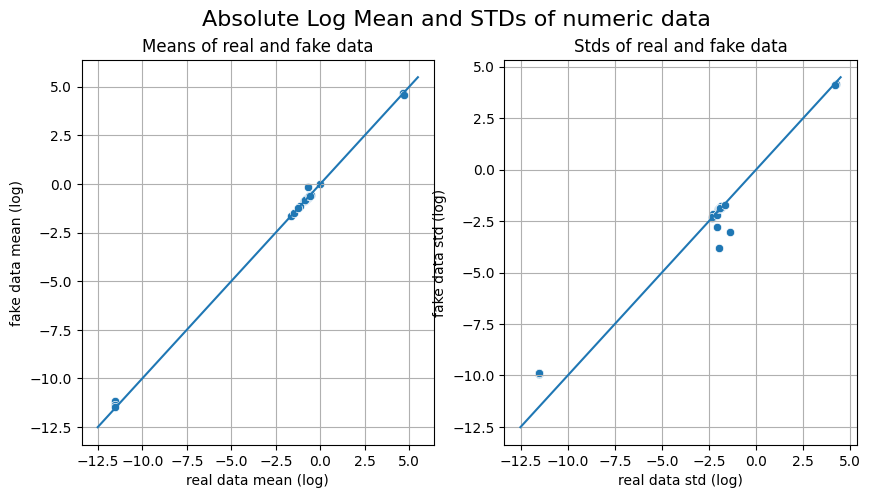

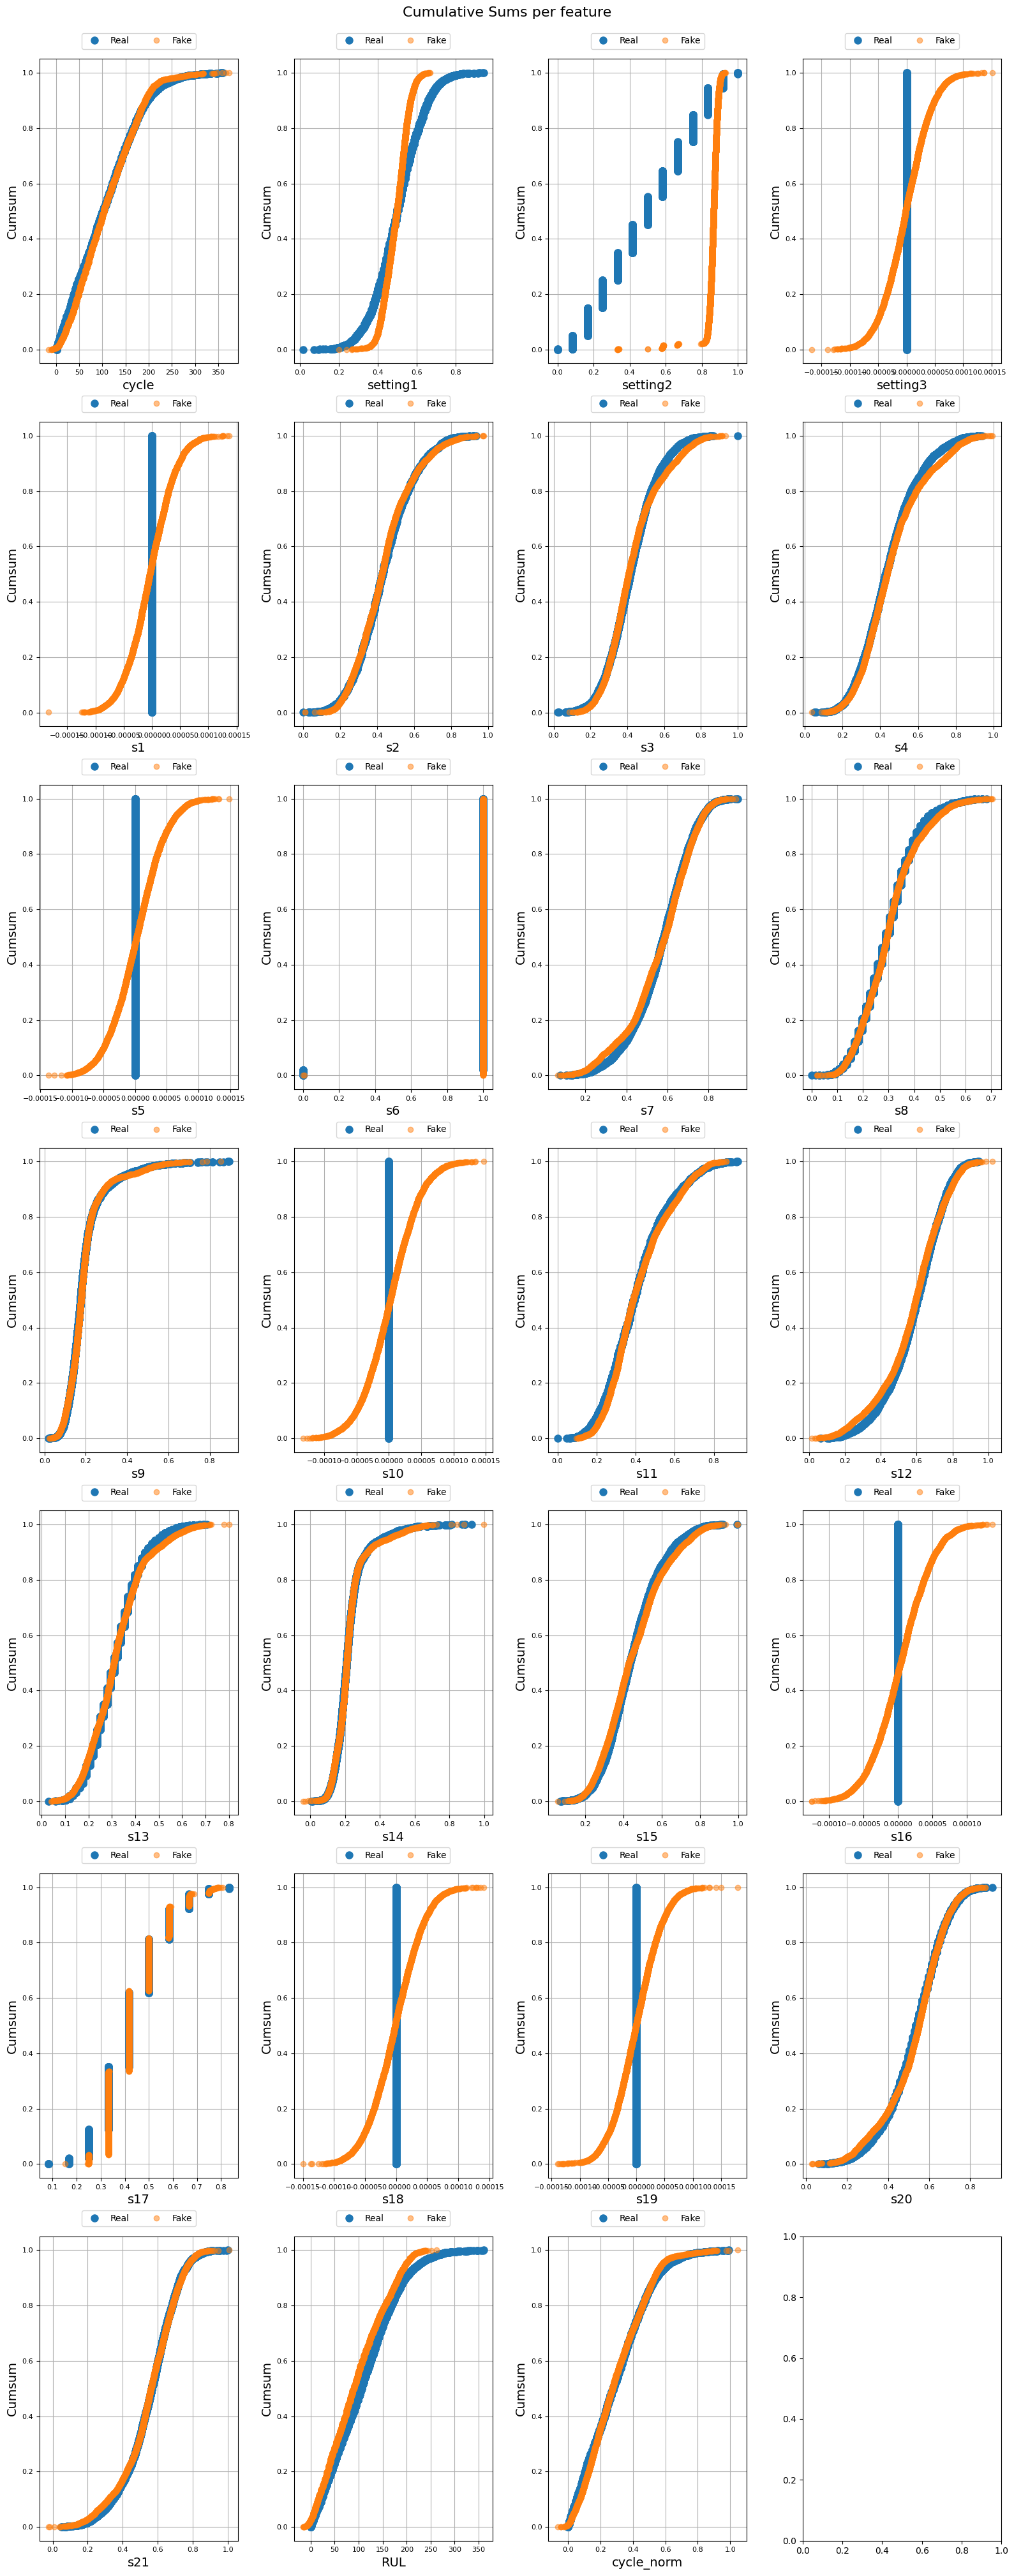

In [ ]:
from table_evaluator import TableEvaluator

table_evaluator =  TableEvaluator(test_data, synthetic_data)

table_evaluator.visual_evaluation()